# 引入
+ 从接口的角度来划分
    + torch.function eg.torch.save
    + tensor.function eg.tensor.view
+ 从存储的角度来划分
    + a.add(b) 不会修改a的自身数据，加法的结果会存储在一个新的tensor中
    + a.add_(b) 会修改自身的数据 将最后结果存入a中

# 创建 
+ torch.Tensor()
+ tolist()# 把b转化为列表，但b的实际数据类型仍然是tensor
+ b.size()
+ b.numel()计算b中元素个数 等价为b.nelement()

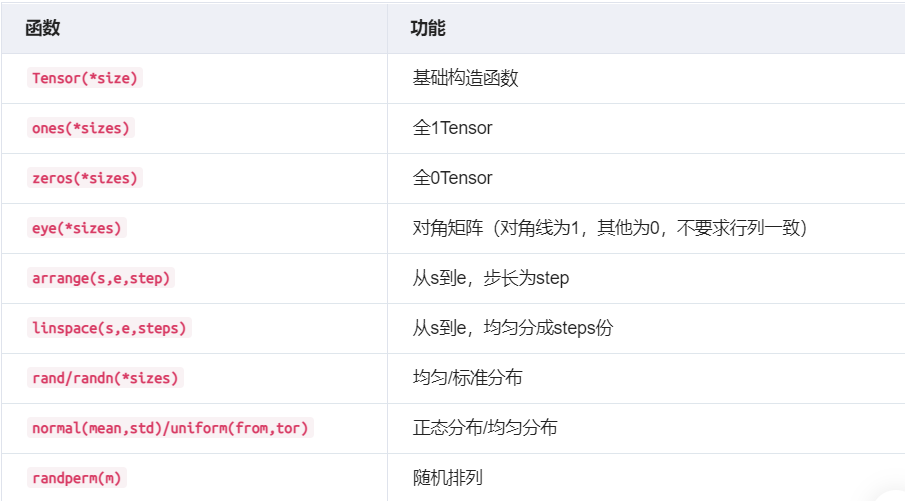

In [2]:
import torch as t
a = t.Tensor(2,3)
b = t.tensor([[1, 2, 3], [2, 3, 4]])  # 通过传入列表构建2*3维的张量
b


tensor([[1, 2, 3],
        [2, 3, 4]])

In [17]:
b.tolist()  # 把b转化为列表，但是b的实际数据类型仍是tensor

[[1, 2, 3], [2, 3, 4]]

In [18]:
b.size()

torch.Size([2, 3])

# 常见操作

## 调整tensor的形状
+ view()
    + 使用方法同reshape 但是原操作数类型不会变
    + 返回的张量和原张量共享内存，修改一个，另外一个也会更改
+ resize()
    + 是另一种用来调整size的方法，但是它相比较view，可以修改tensor的尺寸，如果尺寸超过了原尺寸，则会自动分配新的内存，反之，则会保留老数据

In [19]:
a = t.arange(0, 6) #tensor([0, 1, 2, 3, 4, 5])
b = a.view(2, 3) #调整后的结果赋给新的张量
print(f'a: {a}\n\n b:{b}')

a: tensor([0, 1, 2, 3, 4, 5])

 b:tensor([[0, 1, 2],
        [3, 4, 5]])


In [22]:
c = a.view(-1, 2)  # -1会自动计算大小。注：我已经知道你在想什么了，两个-1你就上天吧，鬼知道你想改成什么形状的
print(f'a: {a}\n\n c:{c}')

a: tensor([0, 1, 2, 3, 4, 5])

 c:tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [23]:
a[1] = 0  # view方法返回的tensor和原tensor共享内存，修改一个，另外一个也会修改
print(f'a: {a}\n\n b:{b}')

a: tensor([0, 0, 2, 3, 4, 5])

 b:tensor([[0, 0, 2],
        [3, 4, 5]])


In [24]:
b.resize_(1, 3)

tensor([[0, 0, 2]])

In [28]:
b.resize_(3, 3)

tensor([[                0,                 0,                 2],
        [                3,                 4,                 5],
        [30962724186357876, 30399692625412147, 32370017465139305]])

In [30]:
b.resize_(2, 3)

tensor([[0, 0, 2],
        [3, 4, 5]])

## 添加或压缩tensor维度
**unsqueeze()可以增加tensor的维度；squeeze()可以压缩tensor的维度**

In [31]:
# 过于抽象，无法理解就跳过。
d = b.unsqueeze(1)  
# 在第1维上增加“1”，也就是2*3的形状变成2*1*3。
# 如果是b.unsqueeze(0)就是在第0维上增加1，形状变成1*2*3。
d, d.size()

(tensor([[[0, 0, 2]],
 
         [[3, 4, 5]]]),
 torch.Size([2, 1, 3]))

In [32]:
b.unsqueeze(-1)  # 在倒数第1维上增加“1”，也就是2*3的形状变成2*3*1。

tensor([[[0],
         [0],
         [2]],

        [[3],
         [4],
         [5]]])

In [33]:
e = b.view(1, 1, 2, 1, 3)
f = e.squeeze(0)  # 压缩第0维的“1”，某一维度为“1”才能压缩，如果第0维的维度是“2”如(2,1,1,1,3)则无法亚索第0维
f, f.size()

(tensor([[[[0, 0, 2]],
 
          [[3, 4, 5]]]]),
 torch.Size([1, 2, 1, 3]))

In [34]:
e.squeeze()  # 把所有维度为“1”的压缩。

tensor([[0, 0, 2],
        [3, 4, 5]])

# 索引操作(gather)

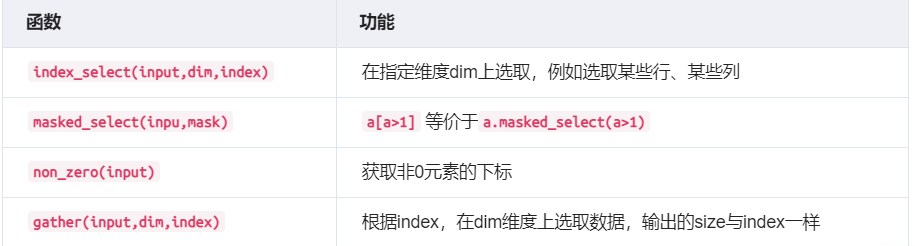

In [ ]:
import torch as t
a = t.arange(0, 16).view(4, 4)
# tensor([[ 0,  1,  2,  3],
#         [ 4,  5,  6,  7],
#         [ 8,  9, 10, 11],
#         [12, 13, 14, 15]])

# 选取对角线的元素
index = t.LongTensor([[0, 1, 2, 3]])
print(f'index: {index}')
a.gather(0, index)  # dim=0


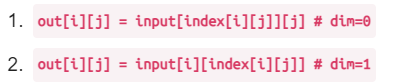
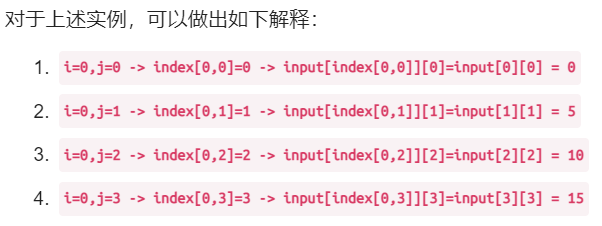

In [36]:
# 选取反对角线上的元素
a = t.arange(0, 16).view(4, 4)
index = t.LongTensor([[3, 2, 1, 0]]).t()  # .t()是转置
print(f'index: {index}')
a.gather(1, index)

index: tensor([[3],
        [2],
        [1],
        [0]])


tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [37]:
# 选取两个对角线上的元素
index = t.LongTensor([[0, 1, 2, 3], [3, 2, 1, 0]]).t()  # .t()是转置
print(f'index: {index}')
b = a.gather(1, index)
b

index: tensor([[0, 3],
        [1, 2],
        [2, 1],
        [3, 0]])


tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

In [38]:
# out = input.gather(dim, index)
# out = Tensor()
# out.scatter_(dim, index)
# 把两个对角线元素放回到指定位置里
c = t.zeros(4, 4, dtype=t.int64)
c.scatter_(1, index, b)


tensor([[ 0,  0,  0,  3],
        [ 0,  5,  6,  0],
        [ 0,  9, 10,  0],
        [12,  0,  0, 15]])

# 高级索引
**常见索引操作与numpy相同 如x[:,0]**<br>
**注：高级索引操作的结果和原tensor不共享内存**

In [3]:
x = t.arange(0, 27).view(3, 3, 3)
# tensor([[[ 0,  1,  2],
#          [ 3,  4,  5],
#          [ 6,  7,  8]],

#         [[ 9, 10, 11],
#          [12, 13, 14],
#          [15, 16, 17]],

#         [[18, 19, 20],
#          [21, 22, 23],
#          [24, 25, 26]]])
x[[1, 2], [1, 2], [2, 0]]  # x[1,1,2] 和 x[2,2,0]

tensor([14, 24])

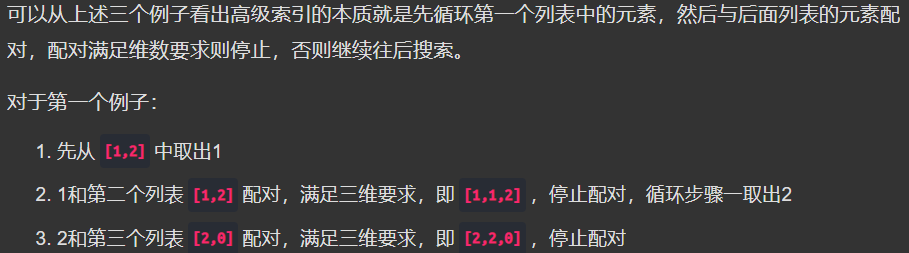

# Tensor类型

## tensor类型

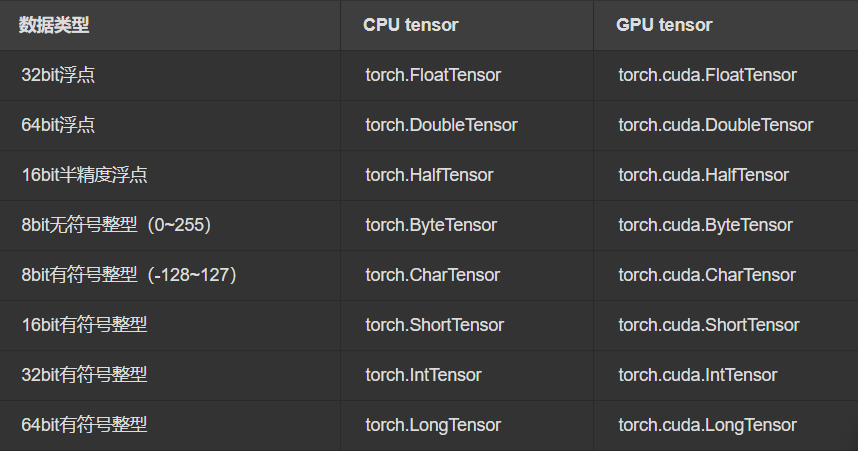

上表中只有HalfTensor值得一提，它是gpu独有的数据类型，使用该数据类型，gpu在存储该类型数据时，内存占用会减少一半，可以解决gpu显存不足的问题，但是由于它所能表示的数值大小和精度有限，所以可能存在溢出问题。

## 数据类型转换
+ t.set_default_tensor_type()
+ float(), int(), double(), char(), long(), int()
+ type_as()类型转换
+ new()生成与a数据类型相同的tensor

In [5]:
# 设置默认tensor，系统默认tensor是FloatTensor，也仅支持浮点数类型为默认数据类型，设置成IntTensor会报错
t.set_default_tensor_type('torch.DoubleTensor')
a = t.Tensor(2, 3)
a, a.type()  # a现在是DoubleTensor

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 'torch.DoubleTensor')

In [6]:
b = a.int()  # 可通过`float(), int(), double(), char(), long(), int()`更换数据类型
b.type()

'torch.IntTensor'

In [ ]:
c = a.type_as(b)  # 对a进行数据类型转换(a的类型与b相同)
c, c.type()

In [7]:
d = a.new(2, 3)  # 生成与a数据类型一致的tensor
d, d.type()

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 'torch.DoubleTensor')

## CPU与GPU间数据类型转换

# 逐元素操作
通俗点讲，就是对tensor进行数学操作，只不过是对tensor的每个元素都进行相对应的操作，因此叫做逐元素操作，**也因此该类操作的输出形状与原tensor形状一致**。常见的逐元素操作如下表：

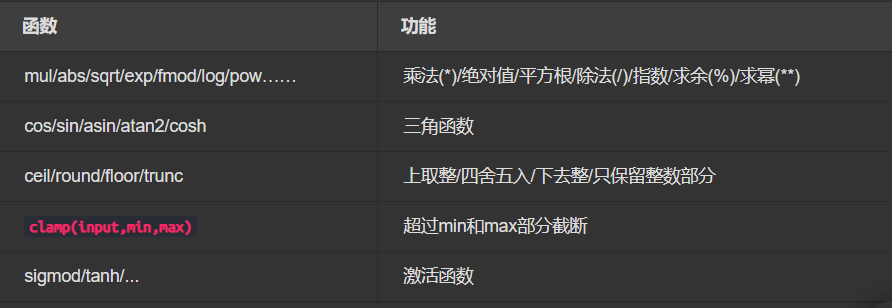

In [8]:
a = t.arange(0, 6).view(2, 3)
# tensor([[0, 1, 2],
#         [3, 4, 5]])
a.clamp(min=3)

tensor([[3, 3, 3],
        [3, 4, 5]])

In [ ]:
torch.mul() #矩阵点乘
torch.mm()# 矩阵相乘 求和

# 归并操作
该类操作可以沿着某一维度进行指定操作，**因此它们的输出形状一般小于元tensor形状**。如加法sum，可以计算正整个tensor的和，也可以计算某一行或某一列的和。常用的归并操作如下表所示

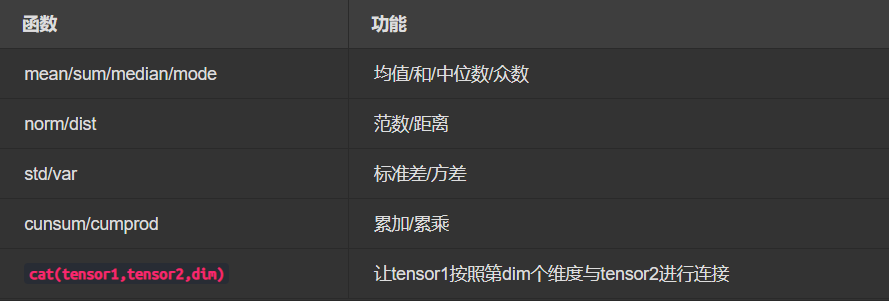

In [9]:
a = t.arange(0, 6).view(2, 3)
# tensor([[0, 1, 2],
#         [3, 4, 5]])
a.cumsum(dim=1)  # 对第二个维度行的元素按照索引顺序进行累加

tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

# 比较

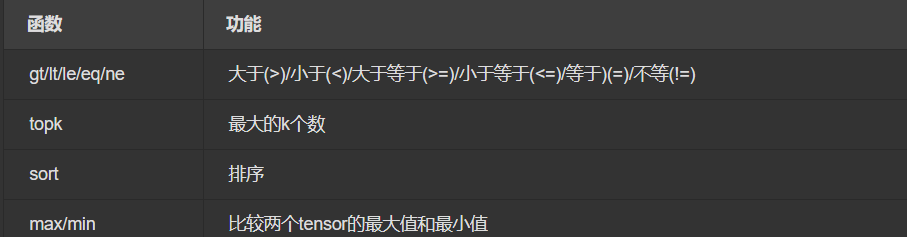

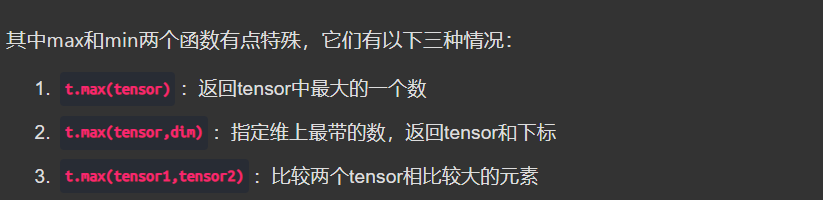

In [10]:
a = t.linspace(0, 15, 6).view(2, 3)
# tensor([[ 0.,  3.,  6.],
#         [ 9., 12., 15.]])

b = t.linspace(15, 0, 6).view(2, 3)
# tensor([[15., 12.,  9.],
#         [ 6.,  3.,  0.]])

t.max(a)

tensor(15.)

In [11]:
t.max(a, 1)  # 返回第0行和第1行的最大的元素

torch.return_types.max(
values=tensor([ 6., 15.]),
indices=tensor([2, 2]))

# 线性代数运算

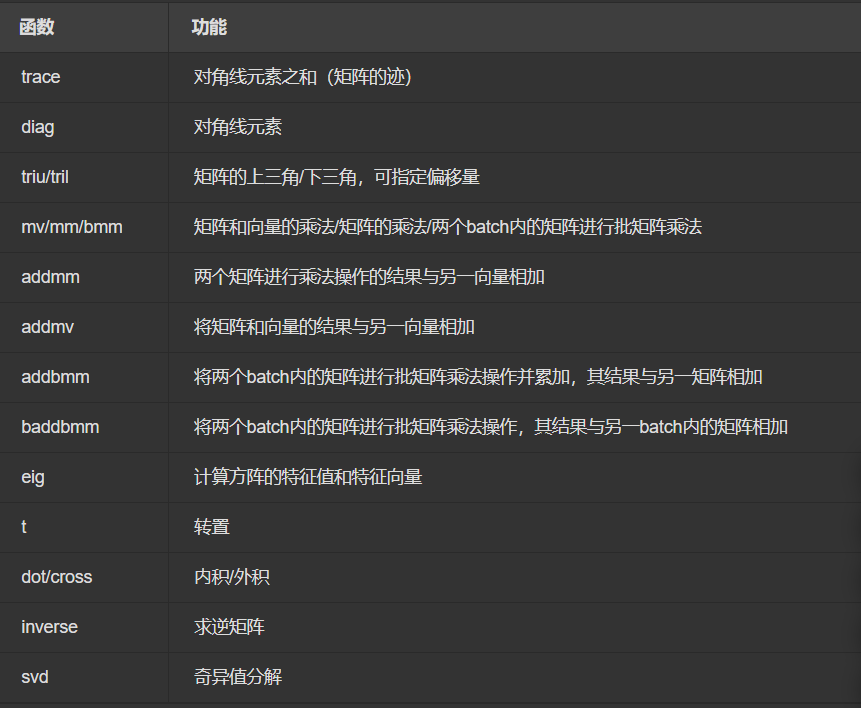

In [12]:
#其中矩阵的转置会导致存储空间不连续，需调用它的.contiguous方法让它连续
b = a.t()
print(b, b.is_contiguous())
b = b.contiguous()
print(b, b.is_contiguous())


tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]]) False
tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]]) True
